# <center>CDS527 Group Project</center>

Your group will be given a business dataset, with a standardized data splitting and evaluation metric. Your task is to develop a “good-performing” decision support system for fraud prediction. To achieve this, you will need to:
1.	Build a baseline model (i.e., a model with basic setup and no fine-tuning, e.g., logistic regression)
2.	Compare with at least three other data analytics models (e.g., Gradient boosting tree, decision tree, etc) 
3.	Fine-Tune different hyper-parameter for each model above and report the best score
4.	Visualize with at least three data statistics. There are many ways that can describe patterns found in data include chart and figures (e.g., bar charts, line graphs, etc), as well as statistical metrics like central tendency (mean, mode and median) and dispersion (range, variance, maximum, minimum, quartiles), correlation and standard deviation. 

## 1 Install Pyspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2 Create SparkContext and SparkSession
Remeber to create a session, which is an entry point to Spark

In [ ]:
# create entry points to spark
from pyspark.sql import SparkSession

ss  = SparkSession.builder \
                            .master("local[1]")\
                            .appName("SparkByExamples.com")\
                            .getOrCreate()
spark = ss.sparkContext

## 3 Import Data

In [ ]:
## read txt file
from google.colab import drive
drive.mount('/content/drive/')
#data_path = "/content/drive/MyDrive/gp_527/"
data_path = "/content/drive/MyDrive/ColabNotebooks/CDS527/GroupProject/"  # this is your drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# read .csv file
df = ss.read.csv(data_path + 'Lab_Car_Insurance_Claim_Prediction_dataset.csv', inferSchema=True, header=True)
df.show(3)

+---------+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+-------------+-----------------+-------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|policy_id|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|   max_torque|        max_power|  engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|wid

## 4 Data Preprocessing - 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import files

%matplotlib inline

In [ ]:
# Check data type of each column
display(df.dtypes)

[('policy_id', 'string'),
 ('policy_tenure', 'double'),
 ('age_of_car', 'double'),
 ('age_of_policyholder', 'double'),
 ('area_cluster', 'string'),
 ('population_density', 'int'),
 ('make', 'int'),
 ('segment', 'string'),
 ('model', 'string'),
 ('fuel_type', 'string'),
 ('max_torque', 'string'),
 ('max_power', 'string'),
 ('engine_type', 'string'),
 ('airbags', 'int'),
 ('is_esc', 'string'),
 ('is_adjustable_steering', 'string'),
 ('is_tpms', 'string'),
 ('is_parking_sensors', 'string'),
 ('is_parking_camera', 'string'),
 ('rear_brakes_type', 'string'),
 ('displacement', 'int'),
 ('cylinder', 'int'),
 ('transmission_type', 'string'),
 ('gear_box', 'int'),
 ('steering_type', 'string'),
 ('turning_radius', 'double'),
 ('length', 'int'),
 ('width', 'int'),
 ('height', 'int'),
 ('gross_weight', 'int'),
 ('is_front_fog_lights', 'string'),
 ('is_rear_window_wiper', 'string'),
 ('is_rear_window_washer', 'string'),
 ('is_rear_window_defogger', 'string'),
 ('is_brake_assist', 'string'),
 ('is_p

In [ ]:
# Remove column "policy_id" becuase it is useless for prediction modelling

df = df.drop(df['policy_id'])
df.show(3)

+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+-------------+-----------------+-------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|   max_torque|        max_power|  engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|width|height|gross_weig

In [ ]:
# Change 'make' to string data type as it is categorical data
df = df.withColumn("make", df.make.cast("string"))

# Change 'ncap_rating' to string data type as it is categorical data
df = df.withColumn("ncap_rating", df.make.cast("string"))

In [ ]:
# Check if 'make' and 'ncap_rating' are changed to string data type
display(df.dtypes)

[('policy_tenure', 'double'),
 ('age_of_car', 'double'),
 ('age_of_policyholder', 'double'),
 ('area_cluster', 'string'),
 ('population_density', 'int'),
 ('make', 'string'),
 ('segment', 'string'),
 ('model', 'string'),
 ('fuel_type', 'string'),
 ('max_torque', 'string'),
 ('max_power', 'string'),
 ('engine_type', 'string'),
 ('airbags', 'int'),
 ('is_esc', 'string'),
 ('is_adjustable_steering', 'string'),
 ('is_tpms', 'string'),
 ('is_parking_sensors', 'string'),
 ('is_parking_camera', 'string'),
 ('rear_brakes_type', 'string'),
 ('displacement', 'int'),
 ('cylinder', 'int'),
 ('transmission_type', 'string'),
 ('gear_box', 'int'),
 ('steering_type', 'string'),
 ('turning_radius', 'double'),
 ('length', 'int'),
 ('width', 'int'),
 ('height', 'int'),
 ('gross_weight', 'int'),
 ('is_front_fog_lights', 'string'),
 ('is_rear_window_wiper', 'string'),
 ('is_rear_window_washer', 'string'),
 ('is_rear_window_defogger', 'string'),
 ('is_brake_assist', 'string'),
 ('is_power_door_locks', 'stri

In [ ]:
# Create a List of Column Names with data type is string only.

stringColList = [i[0] for i in df.dtypes if i[1] == 'string']
stringColList

['area_cluster',
 'make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating']

In [ ]:
# Create a List of Column Names with data type is numerical only.

numericColList = [i[0] for i in df.dtypes if i[1] != 'string']
numericColList

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_claim']

In [ ]:
# Remove label column 'is_claim' from numerical column list because it is label column.

numericColList.remove('is_claim')
numericColList

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight']

In [ ]:
# Demonstrate numerical data statistical results
df.select(numericColList).describe().show()

+-------+------------------+-------------------+-------------------+------------------+------------------+-----------------+-------------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+
|summary|     policy_tenure|         age_of_car|age_of_policyholder|population_density|           airbags|     displacement|           cylinder|          gear_box|     turning_radius|           length|             width|           height|      gross_weight|
+-------+------------------+-------------------+-------------------+------------------+------------------+-----------------+-------------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+
|  count|              5000|               5000|               5000|              5000|              5000|             5000|               5000|              5000|               5000|             5000|              5000|      

## 5 Data Exploration

### 5.1 General Info of Policies

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

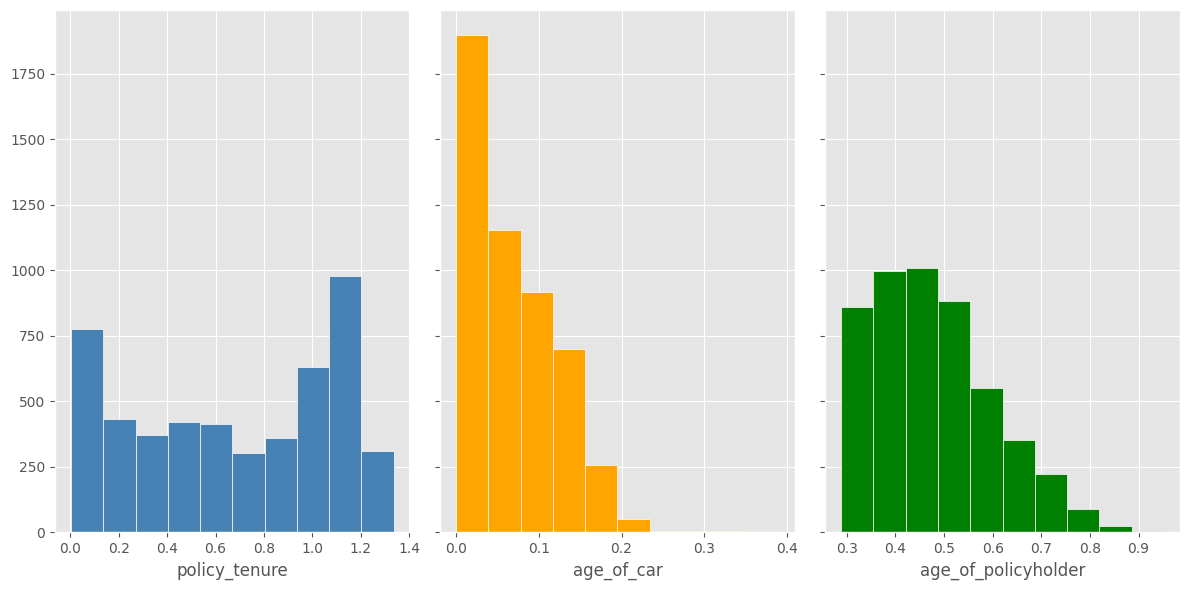

In [ ]:
plt.style.use('ggplot')

# select the variable to be displayed in histogram
data1 = df.select('policy_tenure').toPandas()
data2 = df.select('age_of_car').toPandas()
data3 = df.select('age_of_policyholder').toPandas()

var1 = 'policy_tenure'
var2 = 'age_of_car'
var3 = 'age_of_policyholder'

x1 = data1[var1]
x2 = data2[var2]
x3 = data3[var3]

bins = np.arange(0, 1.5, 0.1) # the range for x-axis, 1 to 1.5, every 0.1 as a unit 

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(12,6))

axs[0].hist(x1, color='steelblue', edgecolor='white')
axs[0].set_xlabel(var1)
axs[1].hist(x2, color='orange', edgecolor='white')
axs[1].set_xlabel(var2)
axs[2].hist(x3, color='green', edgecolor='white')
axs[2].set_xlabel(var3)

#plt.savefig('policy.png', dpi=300)
#files.download('policy.png')
plt.show()

### 5.2 Each Area Population Density vs. Claim Cases

In [ ]:
a = df.select('population_density', 'area_cluster').toPandas()
a

,population_density,area_cluster
0,8794,C8
1,8794,C8
2,34738,C5
3,34738,C5
4,4076,C3
...,...,...
4995,73430,C10
4996,73430,C10
4997,4990,C1
4998,6112,C7


In [ ]:
b = a.groupby(['area_cluster']).mean()
b.sort_values(by='population_density', ascending=False)

,population_density
area_cluster,
C10,73430.0
C17,65567.0
C18,35036.0
C12,34791.0
C5,34738.0
C19,27742.0
C2,27003.0
C4,21622.0
C20,20905.0


In [ ]:
c = df.select('area_cluster', 'is_claim').toPandas()
c

,area_cluster,is_claim
0,C8,0
1,C8,0
2,C5,0
3,C5,0
4,C3,1
...,...,...
4995,C10,0
4996,C10,1
4997,C1,1
4998,C7,0


In [ ]:
d = c.groupby(['area_cluster']).sum()
d

,is_claim
area_cluster,
C1,50
C10,97
C11,48
C12,54
C13,122
C14,185
C15,27
C16,12
C17,14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

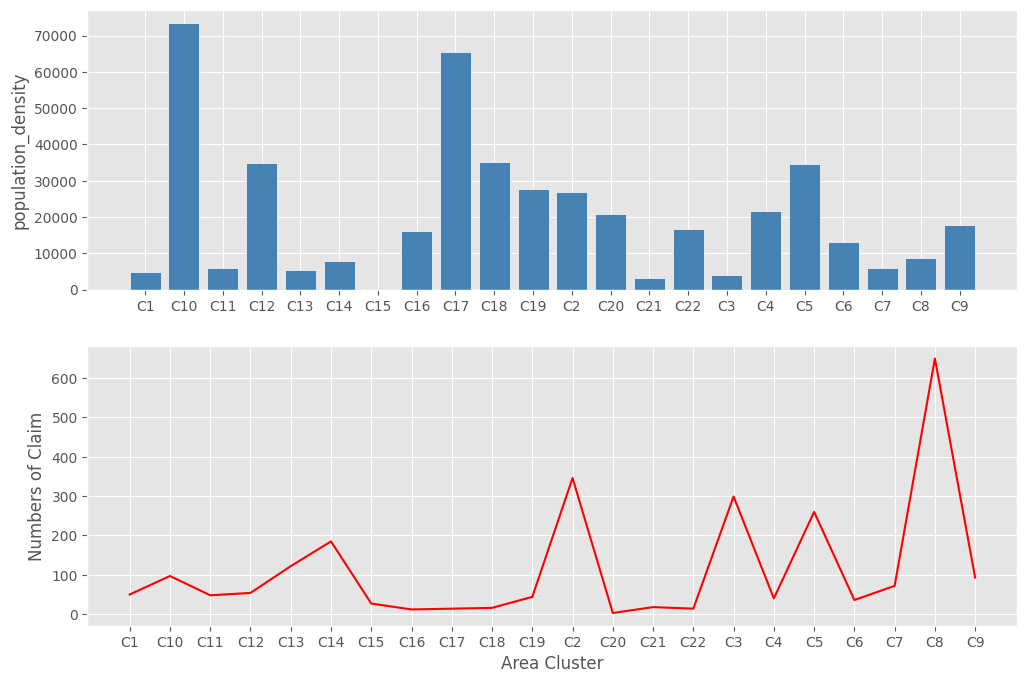

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1, figsize=(12,8))

axs[0].bar(b.index, b['population_density'], color='steelblue', edgecolor='white')
axs[0].set_ylabel('population_density')
axs[1].plot(d.index, d['is_claim'], color='red')
axs[1].set_xlabel('Area Cluster')
axs[1].set_ylabel('Numbers of Claim')

#plt.savefig('area.png', dpi=300)
#files.download('area.png')
plt.show()

### 5.3 Car Manufacturer vs. Claim Cases

In [ ]:
e = df.select('make', 'model', 'is_claim').toPandas()
e

,make,model,is_claim
0,3,M4,0
1,3,M4,0
2,5,M9,0
3,3,M4,0
4,1,M1,1
...,...,...,...
4995,1,M6,0
4996,1,M1,1
4997,1,M1,1
4998,5,M9,0


In [ ]:
f = e.groupby(['make','model']).sum().reset_index()
f

,make,model,is_claim
0,1,M1,615
1,1,M10,50
2,1,M2,55
3,1,M6,628
4,1,M7,133
5,1,M8,161
6,2,M3,75
7,3,M4,602
8,4,M11,10
9,4,M5,84


In [ ]:
g = e.groupby(['make','model']).count().reset_index()
g

,make,model,is_claim
0,1,M1,1274
1,1,M10,108
2,1,M2,107
3,1,M6,1211
4,1,M7,263
5,1,M8,337
6,2,M3,174
7,3,M4,1173
8,4,M11,30
9,4,M5,156


In [ ]:
h = f.merge(g, left_on='model', right_on='model')
h

,make_x,model,is_claim_x,make_y,is_claim_y
0,1,M1,615,1,1274
1,1,M10,50,1,108
2,1,M2,55,1,107
3,1,M6,628,1,1211
4,1,M7,133,1,263
5,1,M8,161,1,337
6,2,M3,75,2,174
7,3,M4,602,3,1173
8,4,M11,10,4,30
9,4,M5,84,4,156


In [ ]:
h['pres_claim'] = h.is_claim_x / h.is_claim_y
h

,make_x,model,is_claim_x,make_y,is_claim_y,pres_claim
0,1,M1,615,1,1274,0.482732
1,1,M10,50,1,108,0.462963
2,1,M2,55,1,107,0.514019
3,1,M6,628,1,1211,0.518580
4,1,M7,133,1,263,0.505703
5,1,M8,161,1,337,0.477745
6,2,M3,75,2,174,0.431034
7,3,M4,602,3,1173,0.513214
8,4,M11,10,4,30,0.333333
9,4,M5,84,4,156,0.538462


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

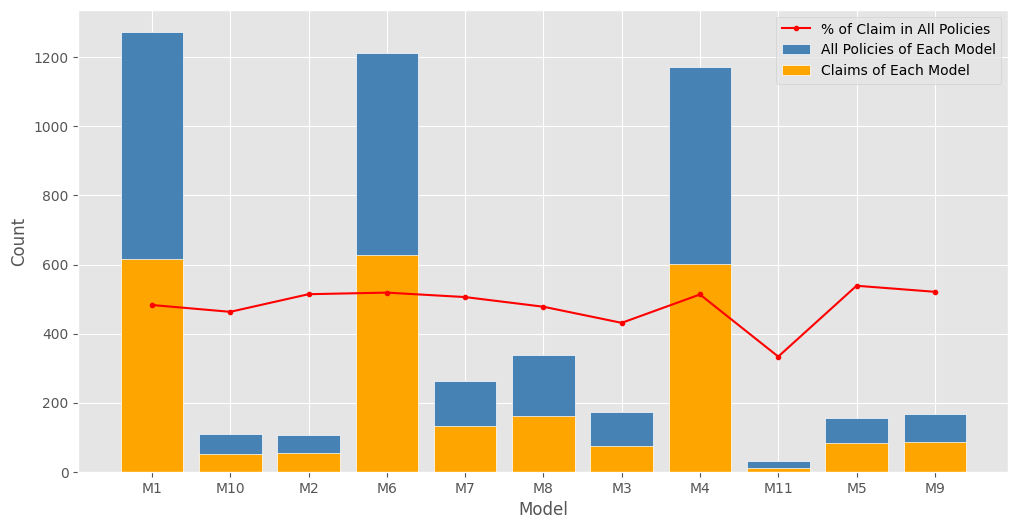

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(12,6))
plt.bar(h['model'], h['is_claim_y'], color='steelblue', edgecolor='white', label='All Policies of Each Model')
plt.bar(h['model'], h['is_claim_x'], color='orange', edgecolor='white', label='Claims of Each Model')
plt.plot(h['model'], h['pres_claim']*1000, color='red', marker='.', label='% of Claim in All Policies')
plt.xlabel('Model')
plt.ylabel('Count')
plt.legend()

#plt.savefig('model.png', dpi=300)
#files.download('model.png')

plt.show()

### 5.4 Rear Brake Type vs. Claim Cases

In [ ]:
j = df.select('rear_brakes_type', 'is_claim').toPandas()
j

,rear_brakes_type,is_claim
0,Disc,0
1,Disc,0
2,Drum,0
3,Disc,0
4,Drum,1
...,...,...
4995,Drum,0
4996,Drum,1
4997,Drum,1
4998,Drum,0


In [ ]:
j.groupby('rear_brakes_type').sum()

,is_claim
rear_brakes_type,
Disc,602
Drum,1898


In [ ]:
j.groupby('rear_brakes_type').count()

,is_claim
rear_brakes_type,
Disc,1173
Drum,3827


In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

In [ ]:
Drum = j[j["rear_brakes_type"]=='Drum']
Disc = j[j["rear_brakes_type"]=='Disc']

Drum_0 = Drum[j["is_claim"]==0]
Drum_1 = Drum[j["is_claim"]==1]
Disc_0 = Disc[j["is_claim"]==0]
Disc_1 = Disc[j["is_claim"]==1]

labels = ['Drum_0','Drum_1', "Disc_0", "Disc_1"]
values = [len(Drum[j["is_claim"]==0]),len(Drum[j["is_claim"]==1]),
         len(Disc[j["is_claim"]==0]),len(Disc[j["is_claim"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])

#plt.savefig('rear_brake.png', dpi=300)
#files.download('rear_brake.png')

fig.show()

<ipython-input-204-4d265559c7df>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-204-4d265559c7df>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-204-4d265559c7df>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-204-4d265559c7df>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-204-4d265559c7df>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-204-4d265559c7df>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

### 5.5 Cylinder vs. Claim Cases

In [ ]:
k = df.select('cylinder', 'is_claim').toPandas()
k

,cylinder,is_claim
0,4,0
1,4,0
2,4,0
3,4,0
4,3,1
...,...,...
4995,4,0
4996,3,1
4997,3,1
4998,4,0


In [ ]:
k.groupby('cylinder').sum()

,is_claim
cylinder,
3,861
4,1639


In [ ]:
k.groupby('cylinder').count()

,is_claim
cylinder,
3,1815
4,3185


In [ ]:
cyl3 = k[k["cylinder"]==3]
cyl4 = k[k["cylinder"]==4]

cylinder3_0 = cyl3[k["is_claim"]==0]
cylinder3_1 = cyl3[j["is_claim"]==1]
cylinder4_0 = cyl4[j["is_claim"]==0]
cylinder4_1 = cyl4[j["is_claim"]==1]

labels = ['Cylinder_3_0','Cylinder_3_1', "Cylinder_4_0", "Cylinder_4_1"]
values = [len(cyl3[k["is_claim"]==0]),len(cyl3[k["is_claim"]==1]),
         len(cyl4[k["is_claim"]==0]),len(cyl4[k["is_claim"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])

#plt.savefig('cylinder.png', dpi=300)
#files.download('cylinder.png')

fig.show()
plt.show()

<ipython-input-206-fb6b02972bce>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-206-fb6b02972bce>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-206-fb6b02972bce>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-206-fb6b02972bce>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-206-fb6b02972bce>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-206-fb6b02972bce>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

### 5.6 Safety rating given by NCAP vs. Claim Cases

In [ ]:
df_ra = df.select('ncap_rating', 'is_claim').toPandas()
df_ra

,ncap_rating,is_claim
0,3,0
1,3,0
2,5,0
3,3,0
4,1,1
...,...,...
4995,1,0
4996,1,1
4997,1,1
4998,5,0


In [ ]:
n = df_ra.groupby('ncap_rating').sum().reset_index()
n

,ncap_rating,is_claim
0,1,1642
1,2,75
2,3,602
3,4,94
4,5,87


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

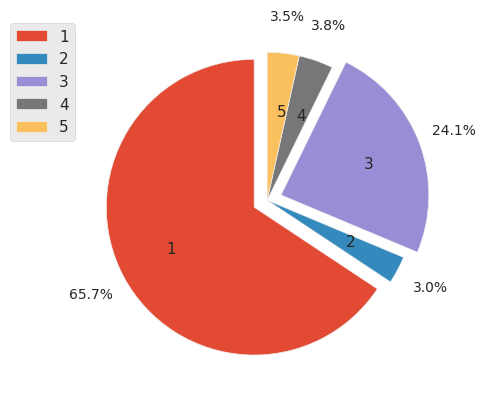

In [ ]:

explode = (0.1, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(n['is_claim'], explode=explode, labels=n['ncap_rating'], autopct='%1.1f%%',
        shadow=False, startangle=90,
       pctdistance=1.25, labeldistance=.6
       )

plt.legend(bbox_to_anchor=(0, 1))

#plt.savefig('ncapRating.png', dpi=300)
#files.download('ncapRating.png')
plt.show()

### 5.7 Label Distribution

In [ ]:
df_label = df.select('is_claim').toPandas()
df_label

,is_claim
0,0
1,0
2,0
3,0
4,1
...,...
4995,0
4996,1
4997,1
4998,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

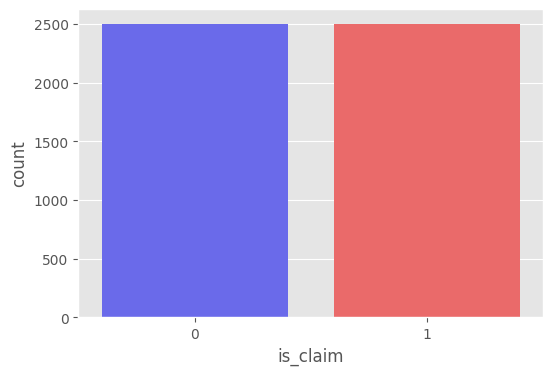

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(6,4))
sns.countplot(data=df_label, x="is_claim", palette="seismic")

#plt.savefig('labelDis.png', dpi=300)
#files.download('labelDis.png')
plt.show()

### 5.8 Correlation matrix between numerical features and label

In [ ]:
# Demonstrate the correlation matrix between numerical features and label

from pyspark.mllib.stat import Statistics
import pandas as pd
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler


# Get the column for creating the column for display
num_cols = ['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_claim']  # get the credit balance and no. of card columns from the data
corr_data = df.select(num_cols)

# merge columns to fit into the .corr function 
assembler = VectorAssembler(
    inputCols=corr_data.columns, 
    outputCol="indexed_features")
transformed_df = assembler.transform(df).select("indexed_features")

# Pyspark .corr turn a sparse 3-d matrix, we convert it back to a 2-d array 
pearsonCorr = Correlation.corr(transformed_df, "indexed_features", 'pearson').collect()[0][0].toArray()

## we output peasonCorr using Panda Dataframe, since Pyspark Dataframe don't display index and col name
corr_df = pd.DataFrame(pearsonCorr, index=num_cols, columns=num_cols)
print(corr_df.to_string())

                     policy_tenure  age_of_car  age_of_policyholder  population_density   airbags  displacement  cylinder  gear_box  turning_radius    length     width    height  gross_weight  is_claim
policy_tenure             1.000000    0.175126             0.173972           -0.115305  0.143068      0.266100  0.258233  0.130889        0.227439  0.259946  0.282586  0.151898      0.191966  0.159749
age_of_car                0.175126    1.000000            -0.010738           -0.065521  0.202865      0.415142  0.403415  0.202502        0.341770  0.400339  0.436167  0.279373      0.314316 -0.062731
age_of_policyholder       0.173972   -0.010738             1.000000           -0.014116  0.011799      0.003910  0.029135  0.012379        0.009949  0.008394  0.020598 -0.039549      0.009597  0.038247
population_density       -0.115305   -0.065521            -0.014116            1.000000 -0.064467     -0.112898 -0.118554 -0.058158       -0.090554 -0.109070 -0.117996 -0.070156     -0.089070 

## 6 Model00 - Logistic Regression (Baseline)

### 6.1 Data Preprocessing - 2

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Build StringIndexer stages to convert categorical columns to numeric by StringIndexer.
stringindexer_stages = [StringIndexer(inputCol=c, outputCol='strindexed_' + c) for c in stringColList]

# encode label column and add it to stringindexer_stages
stringindexer_stages += [StringIndexer(inputCol='is_claim', outputCol='label')]

# Build OneHotEncoder stages
onehotencoder_stages = [OneHotEncoder(inputCol='strindexed_' + c, outputCol='onehot_' + c) for c in stringColList]


In [ ]:
# Build VectorAssembler stage for categorical columns - 1 

feature_columns_str = ['onehot_' + c for c in stringColList]
vectorassembler_stage_str = VectorAssembler(inputCols=feature_columns_str, outputCol='features_str')

In [ ]:
# Build VectorAssembler stage for numerical columns - 2

vectorassembler_stage_num = VectorAssembler(inputCols=numericColList, outputCol='features_num')            

In [ ]:
# assemble stages - 1
stages01 = stringindexer_stages + onehotencoder_stages  + [vectorassembler_stage_str] + [vectorassembler_stage_num]
pipeline01 = Pipeline(stages=stages01)

# fit and transform data - 1
pipeline_model01 = pipeline01.fit(df)

asm_columns01 = ['features_str', 'features_num', 'label']
df01 = pipeline_model01.transform(df).\
            select(asm_columns01)
            
df01.show(3, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+-----+
|features_str                                                                                                                                                     |features_num                                                                                        |label|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+-----+
|(93,[0,22,27,32,44,52,60,69,71,75,77,81,82,83,84,85,86,87,88,90],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])              |[0.631560391803943,0.15,

In [ ]:
# Build VectorAssembler stage - 3
feature_columns = ['features_str', 'features_num']
vectorassembler_stage = VectorAssembler(inputCols=feature_columns, outputCol='features')

In [ ]:
# assemble stages - 2

pipeline02 = Pipeline(stages=[vectorassembler_stage])

# fit and transform data - 2
pipeline_model02 = pipeline02.fit(df01)

asm_columns02 = ['features', 'label']
df02 = pipeline_model02.transform(df01).\
            select(asm_columns02)
            
df02.show(3, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                                                                                          |label|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|(106,[0,22,27,32,44,52,60,69,71,75,77,81,82,83,84,85,8

In [ ]:
# split data into training and test datasets
train, test = df02.randomSplit([0.8, 0.2], seed=42)  # remeber to fix seed 
train.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(106,[0,21,25,31,...|  0.0|
|(106,[0,21,25,31,...|  0.0|
|(106,[0,21,25,31,...|  0.0|
+--------------------+-----+
only showing top 3 rows



### 6.2 Build model - Logistic Regression (Baseline)

In [ ]:
from pyspark.ml.classification import LogisticRegression
logr_baseline = LogisticRegression(featuresCol='features', labelCol='label')

### 6.3 Train the model - Logistic Regression (Baseline)

In [ ]:
logr_model_baseline = logr_baseline.fit(train)

In [ ]:
# Make predictions
logr_predictions_baseline = logr_model_baseline.transform(train)
logr_predictions_baseline.show(5)


+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(106,[0,21,25,31,...|  0.0|[0.51018181104521...|[0.62484909425440...|       0.0|
|(106,[0,21,25,31,...|  0.0|[0.13322103543548...|[0.53325608807889...|       0.0|
|(106,[0,21,25,31,...|  0.0|[0.26189412556903...|[0.56510185268490...|       0.0|
|(106,[0,21,25,31,...|  0.0|[0.19247808601315...|[0.54797150957569...|       0.0|
|(106,[0,21,25,31,...|  0.0|[0.36043778843395...|[0.58914640616079...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



### 6.4 Model evaluation - Logistic Regression (Baseline) 

#### ROC

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

roc_evaluator = BinaryClassificationEvaluator(labelCol="label", 
                                          rawPredictionCol="prediction", 
                                          metricName="areaUnderROC")

logr_areaUnderROC_baseline = roc_evaluator.evaluate(logr_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A Logistic Regression baseline model had ROC of: {0:2.2f}%'.format(logr_areaUnderROC_baseline*100))

Here are the results!
--------------------------------------------------------------------------------
A Logistic Regression baseline model had ROC of: 58.62%


#### Accuracy & F-score

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# evaluate
acc_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')
logr_acc_baseline_tr = acc_evaluator.evaluate(logr_predictions_baseline)

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='f1')
logr_f1_baseline_tr = f1_evaluator.evaluate(logr_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A Logistic Regression baseline model had an accuracy of: {0:2.2f}%'.format(logr_acc_baseline_tr*100))
print('A Logistic Regression baseline model had F-score of: {0:2.2f}%'.format(logr_f1_baseline_tr*100))

Here are the results!
--------------------------------------------------------------------------------
A Logistic Regression baseline model had an accuracy of: 58.63%
A Logistic Regression baseline model had F-score of: 58.61%


### 6.5 Plot Confusion Matrix - Logistic Regression (Baseline)

In [ ]:
# show the unique class name as string list
class_temp = logr_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names

In [ ]:
## get the unique class name as string list 
class_temp = logr_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names = list(class_names)

In [ ]:
## a function to plot Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Normalized confusion matrix
[[0.53752535 0.46247465]
 [0.44731183 0.55268817]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

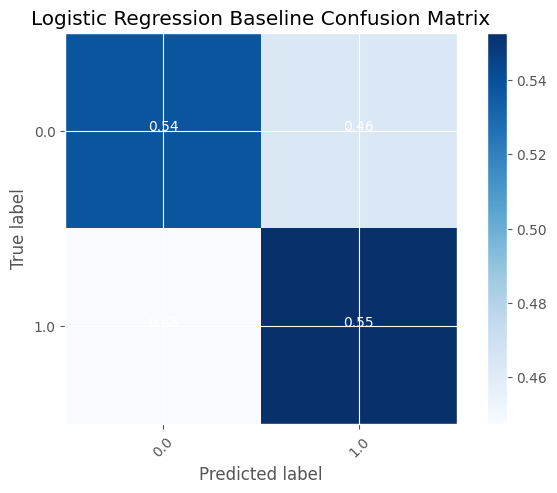

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt

res = logr_predictions_baseline.select("label", "prediction")

# convert result dataframe to rdd
results = res.rdd.map(lambda pl: (pl.prediction, pl.label * 1.0))
results.take(10)

# instantiate metrics object (there is another object for categorial evaluation!!!)
metrics = MulticlassMetrics(results)

# show confusion matrix
cmat = metrics.confusionMatrix().toArray()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmat, classes=class_names, normalize=True,
                      title='Logistic Regression Baseline Confusion Matrix')

plt.savefig('lr_confusionMa.png', dpi=300)
files.download('lr_confusionMa.png')

plt.show()

### 6.6 Run the model on the test set

In [ ]:
logr_predictions_baseline = logr_model_baseline.transform(test)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# evaluate
acc_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')
logr_acc_baseline_test = acc_evaluator.evaluate(logr_predictions_baseline)

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='f1')
logr_f1_baseline_test = f1_evaluator.evaluate(logr_predictions_baseline)

logr_areaUnderROC_test_baseline = roc_evaluator.evaluate(logr_predictions_baseline)


print("Here are the results!")
print('-'*80)
print('The accuracy of the baseline model for logistic regression on the test set is: {0:2.2f}%'.format(logr_acc_baseline_test*100))
print('The F-score of the baseline model for logistic regression on the test set is: {0:2.2f}%'.format(logr_f1_baseline_test*100))
print('A Logistic Regression baseline model had ROC for test set of: {0:2.2f}%'.format(roc_evaluator.evaluate(logr_model_baseline.transform(test))*100))

Here are the results!
--------------------------------------------------------------------------------
The accuracy of the baseline model for logistic regression on the test set is: 54.49%
The F-score of the baseline model for logistic regression on the test set is: 54.50%
A Logistic Regression baseline model had ROC for test set of: 54.51%


### 6.7 Logistic Regression Model Performance Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

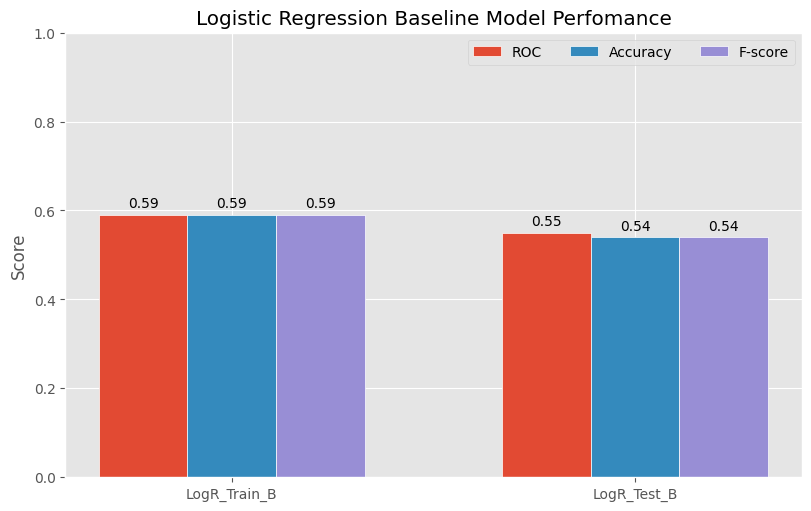

In [ ]:
plt.style.use('ggplot')

model_dataset = ('LogR_Train_B', 'LogR_Test_B')
metric_score = {
    'ROC': (round(logr_areaUnderROC_baseline,2), round(logr_areaUnderROC_test_baseline,2)),
    'Accuracy': (round(logr_acc_baseline_tr,2), round(logr_acc_baseline_test,2)),
    'F-score': (round(logr_f1_baseline_tr,2), round(logr_f1_baseline_test,2)),
}

x = np.arange(len(model_dataset))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(8,5), layout='constrained')

for attribute, measurement in metric_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='white')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Logistic Regression Baseline Model Perfomance')
ax.set_xticks(x + width, model_dataset)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 1)
#plt.savefig('logistic_regression.png', dpi=300)
#files.download('logistic_regression.png')
plt.show()


## 7 Feature Selection

### 7.1 Univariate Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X=train.drop('is_claim',axis=1)
y=train['is_claim']
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X_minmax,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Space','Score']
print(featureScores.nlargest(30,'Score'))

                               Space      Score
0                      policy_tenure  17.924952
4                 population_density   3.252299
1                         age_of_car   2.238939
14            is_adjustable_steering   1.763799
20                          cylinder   1.661130
29               is_front_fog_lights   1.259726
37  is_driver_seat_height_adjustable   0.920420
33                   is_brake_assist   0.823471
9                         max_torque   0.709222
19                      displacement   0.590138
2                age_of_policyholder   0.517649
23                     steering_type   0.412305
6                            segment   0.398320
26                             width   0.375564
25                            length   0.345260
42                            volume   0.280119
8                          fuel_type   0.277079
15                           is_tpms   0.258394
38     is_day_night_rear_view_mirror   0.251152
3                       area_cluster   0

In [ ]:
df = ss.read.csv(data_path + 'Lab_Car_Insurance_Claim_Prediction_dataset.csv', inferSchema=True, header=True)


df = df.select('is_claim','policy_tenure','population_density','age_of_car','is_adjustable_steering',
               'cylinder')
# df = df.select('is_claim','policy_tenure','population_density','age_of_car')

# df = df.select('is_claim','policy_tenure','population_density','age_of_car','area_cluster','age_of_policyholder')
stringColList = [i[0] for i in df.dtypes if i[1] == 'string']
numericColList = [i[0] for i in df.dtypes if i[1] != 'string']
numericColList.remove('is_claim')

### 7.2 Data Preprocessing

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Build StringIndexer stages to convert categorical columns to numeric by StringIndexer.
stringindexer_stages = [StringIndexer(inputCol=c, outputCol='strindexed_' + c) for c in stringColList]

# encode label column and add it to stringindexer_stages
stringindexer_stages += [StringIndexer(inputCol='is_claim', outputCol='label')]

# Build OneHotEncoder stages
onehotencoder_stages = [OneHotEncoder(inputCol='strindexed_' + c, outputCol='onehot_' + c) for c in stringColList]


In [ ]:
# Build VectorAssembler stage for categorical columns - 1 

feature_columns_str = ['onehot_' + c for c in stringColList]
vectorassembler_stage_str = VectorAssembler(inputCols=feature_columns_str, outputCol='features_str')

In [ ]:
# Build VectorAssembler stage for numerical columns - 2

vectorassembler_stage_num = VectorAssembler(inputCols=numericColList, outputCol='features_num')            

In [ ]:
# assemble stages - 1
stages01 = stringindexer_stages + onehotencoder_stages  + [vectorassembler_stage_str] + [vectorassembler_stage_num]

pipeline01 = Pipeline(stages=stages01)

# fit and transform data - 1
pipeline_model01 = pipeline01.fit(df)

asm_columns01 = ['features_str', 'features_num', 'label']
df01 = pipeline_model01.transform(df).\
            select(asm_columns01)
            
df01.show(3, truncate=False)

+------------+-------------------------------+-----+
|features_str|features_num                   |label|
+------------+-------------------------------+-----+
|[]          |[0.631560391803943,8794.0,0.15]|0.0  |
|[]          |[1.18865543757249,8794.0,0.09] |0.0  |
|[]          |[1.00434518625804,34738.0,0.01]|0.0  |
+------------+-------------------------------+-----+
only showing top 3 rows



In [ ]:
# Build VectorAssembler stage - 3
feature_columns = ['features_str', 'features_num']
vectorassembler_stage = VectorAssembler(inputCols=feature_columns, outputCol='features')

In [ ]:
# assemble stages - 2

pipeline02 = Pipeline(stages=[vectorassembler_stage])

# fit and transform data - 2
pipeline_model02 = pipeline02.fit(df01)

asm_columns02 = ['features', 'label']
df02 = pipeline_model02.transform(df01).\
            select(asm_columns02)
            
df02.show(3, truncate=False)

+-------------------------------+-----+
|features                       |label|
+-------------------------------+-----+
|[0.631560391803943,8794.0,0.15]|0.0  |
|[1.18865543757249,8794.0,0.09] |0.0  |
|[1.00434518625804,34738.0,0.01]|0.0  |
+-------------------------------+-----+
only showing top 3 rows



In [ ]:
# split data into training and test datasets
train, test = df02.randomSplit([0.8, 0.2], seed=42)  # remeber to fix seed 
train.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.00277191758933...|  0.0|
|[0.00285005309425...|  1.0|
|[0.00301558695401...|  0.0|
+--------------------+-----+
only showing top 3 rows



In [ ]:
# split data into training and test datasets
train, test = df02.randomSplit([0.8, 0.2], seed=42)  # remeber to fix seed 
train.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.00277191758933...|  0.0|
|[0.00285005309425...|  1.0|
|[0.00301558695401...|  0.0|
+--------------------+-----+
only showing top 3 rows



## 8 Model01 - Decision Tree

### 8.1 Train and Test Model - Decision Tree (Baseline)

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt_baseline = DecisionTreeClassifier(featuresCol='features', labelCol='label')
dt_model_baseline = dt_baseline.fit(train)
# Make predictions
dt_predictions_baseline = dt_model_baseline.transform(train)
dt_predictions_baseline.show(5)


+--------------------+-----+-------------+--------------------+----------+
|            features|label|rawPrediction|         probability|prediction|
+--------------------+-----+-------------+--------------------+----------+
|[0.00277191758933...|  0.0| [245.0,65.0]|[0.79032258064516...|       0.0|
|[0.00285005309425...|  1.0| [245.0,65.0]|[0.79032258064516...|       0.0|
|[0.00301558695401...|  0.0| [245.0,65.0]|[0.79032258064516...|       0.0|
|[0.00303067369617...|  0.0| [245.0,65.0]|[0.79032258064516...|       0.0|
|[0.00304534509251...|  0.0| [245.0,65.0]|[0.79032258064516...|       0.0|
+--------------------+-----+-------------+--------------------+----------+
only showing top 5 rows



### 8.2 Model evaluation - Decision Tree (Baseline)

#### ROC

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

roc_evaluator = BinaryClassificationEvaluator(labelCol="label", 
                                          rawPredictionCol="prediction", 
                                          metricName="areaUnderROC")

dt_areaUnderROC_baseline = roc_evaluator.evaluate(dt_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A Decision Tree baseline model had ROC of: {0:2.2f}%'.format(dt_areaUnderROC_baseline*100))

Here are the results!
--------------------------------------------------------------------------------
A Decision Tree baseline model had ROC of: 61.82%


#### Accuracy & F-score

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# evaluate
acc_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')
dt_acc_baseline = acc_evaluator.evaluate(dt_predictions_baseline)

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='f1')
dt_f1_baseline = f1_evaluator.evaluate(dt_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A Decision Tree baseline model had an accuracy of: {0:2.2f}%'.format(dt_acc_baseline*100))
print('A Decision Tree baseline model had F-score of: {0:2.2f}%'.format(dt_f1_baseline*100))

Here are the results!
--------------------------------------------------------------------------------
A Decision Tree baseline model had an accuracy of: 61.78%
A Decision Tree baseline model had F-score of: 61.37%


### 8.3 Plot Confusion Matrix - Decision Tree (Baseline)

In [ ]:
# show the unique class name as string list
class_temp = dt_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names

In [ ]:
## get the unique class name as string list 
class_temp = dt_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names = list(class_names)

In [ ]:
## a function to plot Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Normalized confusion matrix
[[0.51503204 0.48496796]
 [0.27868852 0.72131148]]


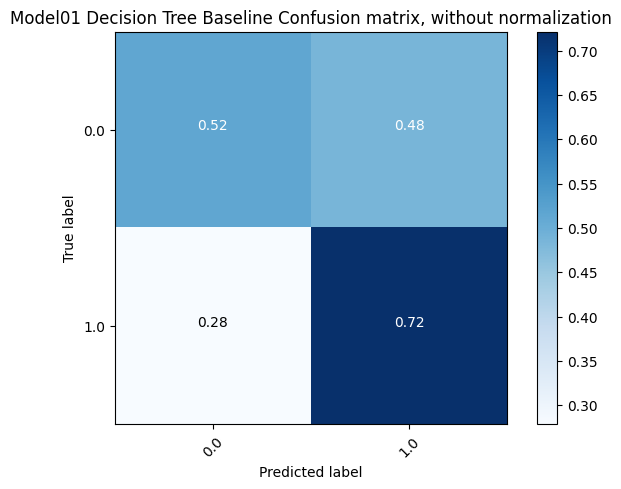

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt

res = dt_predictions_baseline.select("label", "prediction")

# convert result dataframe to rdd
results = res.rdd.map(lambda pl: (pl.prediction, pl.label * 1.0))
results.take(10)

# instantiate metrics object (there is another object for categorial evaluation!!!)
metrics = MulticlassMetrics(results)

# show confusion matrix
cmat = metrics.confusionMatrix().toArray()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmat, classes=class_names, normalize=True,
                      title='Model01 Decision Tree Baseline Confusion matrix, without normalization')
plt.show()

### 8.4 Model Evaluation (Baseline)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
evaluator_f = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                  metricName='f1')
evaluator_acc = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')

test_roc = evaluator.evaluate(dt_model_baseline.transform(test), {evaluator.metricName: "areaUnderROC"})
f1_score_train = evaluator_f.evaluate(dt_model_baseline.transform(train))
acc_train = evaluator_acc.evaluate(dt_model_baseline.transform(train))
f1_score_test = evaluator_f.evaluate(dt_model_baseline.transform(test))
acc_test = evaluator_acc.evaluate(dt_model_baseline.transform(test))

print('The train_accuracy: {0:2.2f}%'.format(acc_train*100))
print('The train_F-score: {0:2.2f}%'.format(f1_score_train*100))
print('The test_accuracy: {0:2.2f}%'.format(f1_score_test*100))
print('The test_F-score: {0:2.2f}%'.format(acc_test*100))
print("Test_SET Area Under ROC: " + str(test_roc))

The train_accuracy: 61.78%
The train_F-score: 61.37%
The test_accuracy: 59.75%
The test_F-score: 60.23%
Test_SET Area Under ROC: 0.5660114135244598


### 8.5 Optimize Parameters by Grid Search

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder

paramGrid = (ParamGridBuilder()
             .addGrid(dt_baseline.maxDepth, [5,30])
             .build())


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator

evaluator = BinaryClassificationEvaluator()
cv_dt = CrossValidator(estimator=dt_baseline, estimatorParamMaps=paramGrid,
                       evaluator=evaluator, numFolds=5)

In [ ]:
cvModel_dt = cv_dt.fit(train)
avgMetrics_dt = cvModel_dt.avgMetrics
bestModel_dt = cvModel_dt.bestModel
print("Best maxDepth: ", bestModel_dt.getMaxDepth())
bestModel_dt

Best maxDepth:  30


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_337b233084cf, depth=27, numNodes=2679, numClasses=2, numFeatures=3

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_f = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                  metricName='f1')
evaluator_acc = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')

test_roc = evaluator.evaluate(cvModel_dt.transform(test), {evaluator.metricName: "areaUnderROC"})
train_roc = evaluator.evaluate(cvModel_dt.transform(train), {evaluator.metricName: "areaUnderROC"})
f1_score_train = evaluator_f.evaluate(cvModel_dt.transform(train))
acc_train = evaluator_acc.evaluate(cvModel_dt.transform(train))
f1_score_test = evaluator_f.evaluate(cvModel_dt.transform(test))
acc_test = evaluator_acc.evaluate(cvModel_dt.transform(test))
print('The train_accuracy: {0:2.2f}%'.format(acc_train*100))
print('The train_F-score: {0:2.2f}%'.format(f1_score_train*100))
print('The test_accuracy: {0:2.2f}%'.format(f1_score_test*100))
print('The test_F-score: {0:2.2f}%'.format(acc_test*100))
print("Test_SET Area Under ROC: " + str(test_roc))
print("train_SET Area Under ROC: " + str(train_roc))

The train_accuracy: 86.49%
The train_F-score: 86.45%
The test_accuracy: 55.59%
The test_F-score: 55.64%
Test_SET Area Under ROC: 0.5702184613104191
train_SET Area Under ROC: 0.8299503204527887


### 8.6 Plot Confusion Matrix - Decision Tree (Optimized)

In [ ]:
# show the unique class name as string list
class_temp = cvModel_dt.transform(test).select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names

In [ ]:
## get the unique class name as string list 
class_temp = cvModel_dt.transform(test).select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names = list(class_names)

In [ ]:
## a function to plot Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Normalized confusion matrix
[[0.59235669 0.40764331]
 [0.47843943 0.52156057]]


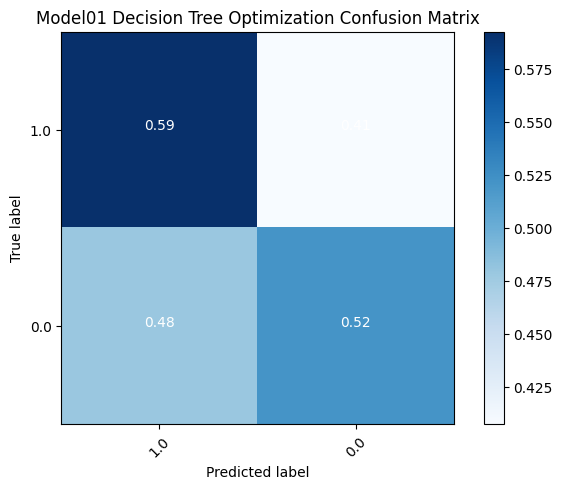

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt

res = cvModel_dt.transform(test).select("label", "prediction")

# convert result dataframe to rdd
results = res.rdd.map(lambda pl: (pl.prediction, pl.label * 1.0))
results.take(10)

# instantiate metrics object (there is another object for categorial evaluation!!!)
metrics = MulticlassMetrics(results)

# show confusion matrix
cmat = metrics.confusionMatrix().toArray()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmat, classes=class_names, normalize=True,
                      title='Model01 Decision Tree Optimization Confusion Matrix')
plt.show()

### 8.7 Decision Tree Model Performance Visualization

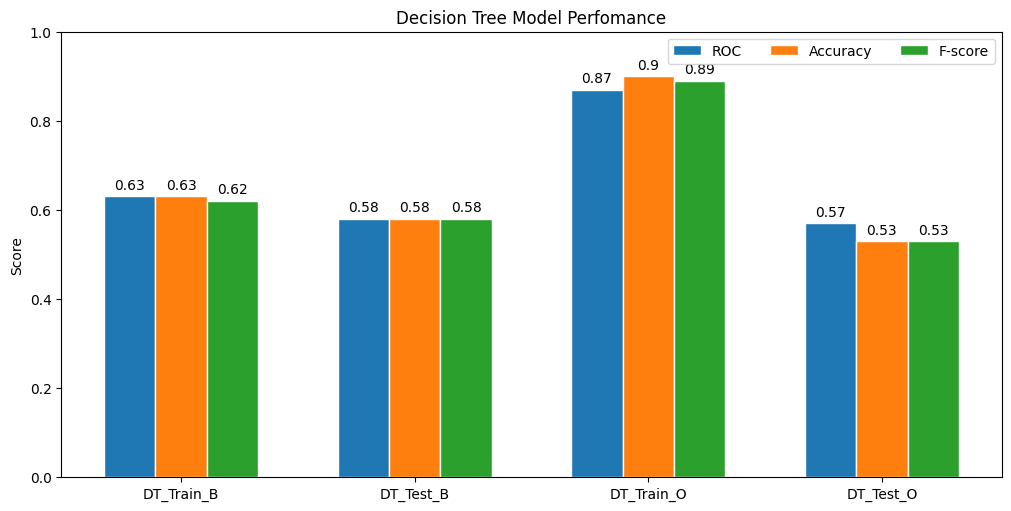

In [ ]:
# plt.style.use('ggplot')

model_dataset = ("DT_Train_B", "DT_Test_B", "DT_Train_O", "DT_Test_O")

metric_score=pd.read_csv('/content/drive/MyDrive/gp_527/dt.csv')

x = np.arange(len(model_dataset))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,5), layout='constrained')

for attribute, measurement in metric_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='white')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Decision Tree Model Perfomance')
ax.set_xticks(x + width, model_dataset)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 1)
plt.savefig('decision_tree.png', dpi=300)
# files.download('decision_tree.png')
plt.show()

## 9 Model02 - Random Forest

### 9.1 Train and Test Model - Random Forest (Baseline)

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf_baseline = RandomForestClassifier(featuresCol='features', labelCol='label')

rf_model_baseline = rf_baseline.fit(train)

# Make predictions
rf_predictions_baseline = rf_model_baseline.transform(train)
rf_predictions_baseline.show(5)


+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,0.0028500530...|  1.0|[15.2736666618748...|[0.76368333309374...|       0.0|
|[0.0,0.0030453450...|  0.0|[15.2736666618748...|[0.76368333309374...|       0.0|
|[0.0,0.0031932162...|  0.0|[14.5065825737436...|[0.72532912868718...|       0.0|
|[0.0,0.0032321567...|  0.0|[7.02957962328912...|[0.35147898116445...|       1.0|
|[0.0,0.0032722277...|  0.0|[15.4718013650240...|[0.77359006825120...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



### 9.2 Model evaluation - Random Forest (Baseline)

#### ROC

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

roc_evaluator = BinaryClassificationEvaluator(labelCol="label", 
                                          rawPredictionCol="prediction", 
                                          metricName="areaUnderROC")

rf_areaUnderROC_baseline = roc_evaluator.evaluate(rf_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A Random Forest baseline model had ROC of: {0:2.2f}%'.format(rf_areaUnderROC_baseline*100))

Here are the results!
--------------------------------------------------------------------------------
A Random Forest baseline model had ROC of: 63.82%


#### Accuracy & F-score

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# evaluate
acc_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')
rf_acc_baseline = acc_evaluator.evaluate(rf_predictions_baseline)

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='f1')
rf_f1_baseline = f1_evaluator.evaluate(rf_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A Random Forest baseline model had an accuracy of: {0:2.2f}%'.format(rf_acc_baseline*100))
print('A Random Forest baseline model had F-score of: {0:2.2f}%'.format(rf_f1_baseline*100))

Here are the results!
--------------------------------------------------------------------------------
A Random Forest baseline model had an accuracy of: 63.73%
A Random Forest baseline model had F-score of: 63.18%


### 9.3 Plot Confusion Matrix - Random Forest (Baseline)

In [ ]:
# show the unique class name as string list
class_temp = rf_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names

In [ ]:
## get the unique class name as string list 
class_temp = rf_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names = list(class_names)

In [ ]:
## a function to plot Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Normalized confusion matrix
[[0.51522593 0.48477407]
 [0.23878365 0.76121635]]


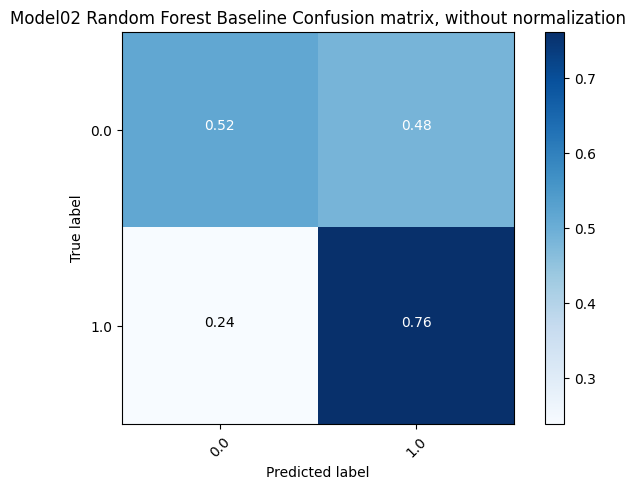

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt

res = rf_predictions_baseline.select("label", "prediction")

# convert result dataframe to rdd
results = res.rdd.map(lambda pl: (pl.prediction, pl.label * 1.0))
results.take(10)

# instantiate metrics object (there is another object for categorial evaluation!!!)
metrics = MulticlassMetrics(results)

# show confusion matrix
cmat = metrics.confusionMatrix().toArray()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmat, classes=class_names, normalize=True,
                      title='Model02 Random Forest Baseline Confusion matrix, without normalization')
plt.show()

### 9.4 Model Evaluation (Baseline)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
evaluator_f = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                  metricName='f1')
evaluator_acc = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')

test_roc = evaluator.evaluate(rf_model_baseline.transform(test), {evaluator.metricName: "areaUnderROC"})
f1_score_train = evaluator_f.evaluate(rf_model_baseline.transform(train))
acc_train = evaluator_acc.evaluate(rf_model_baseline.transform(train))
f1_score_test = evaluator_f.evaluate(rf_model_baseline.transform(test))
acc_test = evaluator_acc.evaluate(rf_model_baseline.transform(test))

print('The train_accuracy: {0:2.2f}%'.format(acc_train*100))
print('The train_F-score: {0:2.2f}%'.format(f1_score_train*100))
print('The test_accuracy: {0:2.2f}%'.format(f1_score_test*100))
print('The test_F-score: {0:2.2f}%'.format(acc_test*100))
print("Test_SET Area Under ROC: " + str(test_roc))

The train_accuracy: 63.73%
The train_F-score: 63.18%
The test_accuracy: 58.87%
The test_F-score: 59.50%
Test_SET Area Under ROC: 0.6309027293033648


### 9.5 Optimize Parameters by Grid Search

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder

paramGrid = (ParamGridBuilder()
             .addGrid(rf_baseline.numTrees, [5，10，20])
             .addGrid(rf_baseline.maxDepth, [5，10，20])
             .build())

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator

evaluator = BinaryClassificationEvaluator()
cv_rf = CrossValidator(estimator=rf_baseline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

In [ ]:
cvModel_rf = cv_rf.fit(train)

In [ ]:
avgMetrics_rf = cvModel_rf.avgMetrics
bestModel_rf = cvModel_rf.bestModel
print("Best maxDepth: ", bestModel_rf.getMaxDepth())
bestModel_rf

Best maxDepth:  5


RandomForestClassificationModel: uid=RandomForestClassifier_afe4a6f5e371, numTrees=20, numClasses=2, numFeatures=5

In [ ]:
avgMetrics_rf

[0.6527857084098251]

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_f = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                  metricName='f1')
evaluator_acc = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction',
                                                  metricName='accuracy')
test_roc = evaluator.evaluate(cvModel_rf.transform(test), {evaluator.metricName: "areaUnderROC"})
f1_score_train = evaluator_f.evaluate(cvModel_rf.transform(train))
acc_train = evaluator_acc.evaluate(cvModel_rf.transform(train))
f1_score_test = evaluator_f.evaluate(cvModel_rf.transform(test))
acc_test = evaluator_acc.evaluate(cvModel_rf.transform(test))


print('The train_accuracy: {0:2.2f}%'.format(acc_train*100))
print('The train_F-score: {0:2.2f}%'.format(f1_score_train*100))
print('The test_accuracy: {0:2.2f}%'.format(f1_score_test*100))
print('The test_F-score: {0:2.2f}%'.format(acc_test*100))
print("Test_SET Area Under ROC: " + str(test_roc))
train_roc = evaluator.evaluate(cvModel_rf.transform(train), {evaluator.metricName: "areaUnderROC"})
print("train_SET Area Under ROC: " + str(train_roc))

The train_accuracy: 63.73%
The train_F-score: 63.18%
The test_accuracy: 58.87%
The test_F-score: 59.50%
Test_SET Area Under ROC: 0.6309027293033648
train_SET Area Under ROC: 0.6856168968536434


### 9.6 Plot Confusion Matrix (Optimized)

In [ ]:
# show the unique class name as string list
class_temp = cvModel_rf.transform(test).select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names

In [ ]:
## get the unique class name as string list 
class_temp = cvModel_rf.transform(test).select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names = list(class_names)

In [ ]:
## a function to plot Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Normalized confusion matrix
[[0.46982759 0.53017241]
 [0.28744939 0.71255061]]


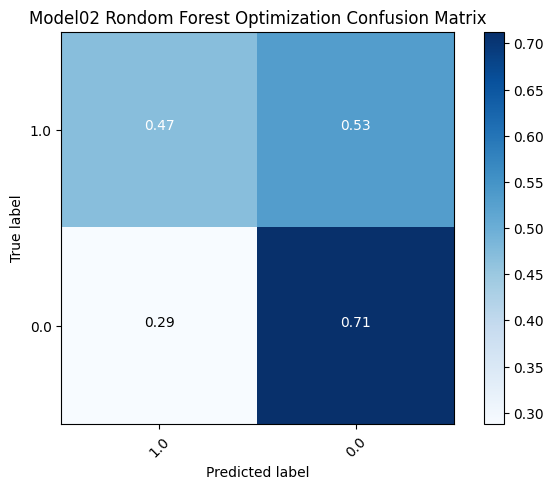

<Figure size 640x480 with 0 Axes>

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt

res = cvModel_rf.transform(test).select("label", "prediction")

# convert result dataframe to rdd
results = res.rdd.map(lambda pl: (pl.prediction, pl.label * 1.0))
results.take(10)

# instantiate metrics object (there is another object for categorial evaluation!!!)
metrics = MulticlassMetrics(results)

# show confusion matrix
cmat = metrics.confusionMatrix().toArray()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmat, classes=class_names, normalize=True,
                      title='Model02 Rondom Forest Optimization Confusion Matrix')
plt.show()
plt.savefig('rfcm.png')

### 9.7 Random Forest Model Performance Visualization

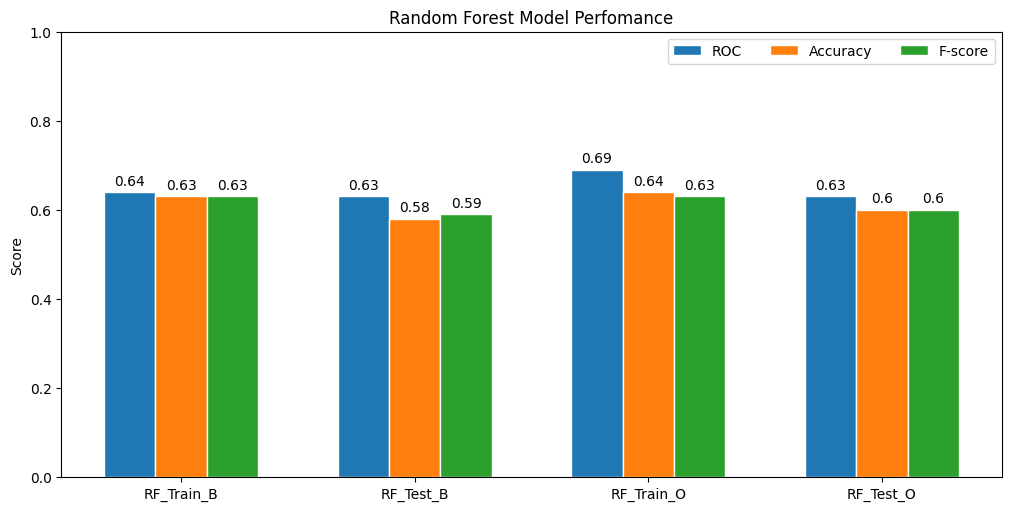

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
# plt.style.use('ggplot')

model_dataset = ("RF_Train_B", "RF_Test_B", "RF_Train_O", "RF_Test_O")
metric_score=pd.read_csv('/content/drive/MyDrive/gp_527/rf.csv')

x = np.arange(len(model_dataset))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,5), layout='constrained')

for attribute, measurement in metric_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='white')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Random Forest Model Perfomance')
ax.set_xticks(x + width, model_dataset)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 1)
plt.savefig('rf.png', dpi=300)
# files.download('decision_tree.png')
plt.show()

## 10 Model03 - GBT (Baseline)

### 10.1 Train and Test Model - GBT (Baseline)

In [ ]:
from pyspark.ml.classification import GBTClassifier

gbt_baseline = GBTClassifier(featuresCol='features', labelCol='label')

gbt_model_baseline = gbt_baseline.fit(train)

# Make predictions
gbt_predictions_baseline = gbt_model_baseline.transform(train)
gbt_predictions_baseline.show(5)


+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,0.0028500530...|  1.0|[0.61716655038616...|[0.77457606830947...|       0.0|
|[0.0,0.0030453450...|  0.0|[0.72738343418541...|[0.81073097577518...|       0.0|
|[0.0,0.0031932162...|  0.0|[1.03924525479205...|[0.88879492504796...|       0.0|
|[0.0,0.0032321567...|  0.0|[0.02537142953770...|[0.51268299349809...|       0.0|
|[0.0,0.0032722277...|  0.0|[0.73015730907557...|[0.81158079009568...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



### 10.2 Model evaluation - GBT (Baseline)

#### ROC

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

roc_evaluator = BinaryClassificationEvaluator(labelCol="label", 
                                          rawPredictionCol="prediction", 
                                          metricName="areaUnderROC")

gbt_areaUnderROC_baseline = roc_evaluator.evaluate(gbt_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A GBTClassifer baseline model had ROC of: {0:2.2f}%'.format(gbt_areaUnderROC_baseline*100))

Here are the results!
--------------------------------------------------------------------------------
A GBTClassifer baseline model had ROC of: 67.72%


#### Accuracy & F-score

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# evaluate
acc_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')
gbt_acc_baseline = acc_evaluator.evaluate(gbt_predictions_baseline)

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='f1')
gbt_f1_baseline = f1_evaluator.evaluate(gbt_predictions_baseline)

print("Here are the results!")
print('-'*80)
print('A GBTClassifier baseline model had an accuracy of: {0:2.2f}%'.format(gbt_acc_baseline*100))
print('A GBTClassifier baseline model had F-score of: {0:2.2f}%'.format(gbt_f1_baseline*100))

Here are the results!
--------------------------------------------------------------------------------
A GBTClassifier baseline model had an accuracy of: 67.66%
A GBTClassifier baseline model had F-score of: 67.51%


### 10.3 Plot Confusion Matrix - GBTClassifier (Baseline)

In [ ]:
# show the unique class name as string list
class_temp = gbt_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names

In [ ]:
## get the unique class name as string list 
class_temp = gbt_predictions_baseline.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names = list(class_names)

In [ ]:
## a function to plot Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Normalized confusion matrix
[[0.60658153 0.39341847]
 [0.25224327 0.74775673]]


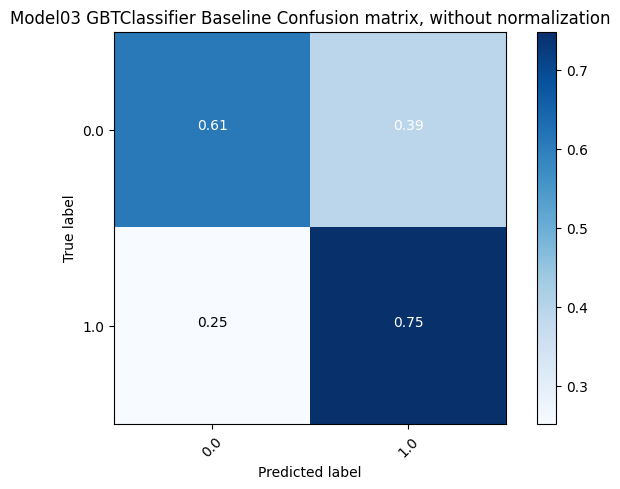

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt

res = gbt_predictions_baseline.select("label", "prediction")

# convert result dataframe to rdd
results = res.rdd.map(lambda pl: (pl.prediction, pl.label * 1.0))
results.take(10)

# instantiate metrics object (there is another object for categorial evaluation!!!)
metrics = MulticlassMetrics(results)

# show confusion matrix
cmat = metrics.confusionMatrix().toArray()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmat, classes=class_names, normalize=True,
                      title='Model03 GBTClassifier Baseline Confusion matrix, without normalization')
plt.show()

### 10.4 Model Evaluation (Baseline)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
evaluator_f = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                  metricName='f1')
evaluator_acc = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')

test_roc = evaluator.evaluate(gbt_model_baseline.transform(test), {evaluator.metricName: "areaUnderROC"})
f1_score_train = evaluator_f.evaluate(gbt_model_baseline.transform(train))
acc_train = evaluator_acc.evaluate(gbt_model_baseline.transform(train))
f1_score_test = evaluator_f.evaluate(gbt_model_baseline.transform(test))
acc_test = evaluator_acc.evaluate(gbt_model_baseline.transform(test))

print('The train_accuracy: {0:2.2f}%'.format(acc_train*100))
print('The train_F-score: {0:2.2f}%'.format(f1_score_train*100))
print('The test_accuracy: {0:2.2f}%'.format(f1_score_test*100))
print('The test_F-score: {0:2.2f}%'.format(acc_test*100))
print("Test_SET Area Under ROC: " + str(test_roc))

The train_accuracy: 67.66%
The train_F-score: 67.51%
The test_accuracy: 59.36%
The test_F-score: 59.60%
Test_SET Area Under ROC: 0.6340744101633395


### 10.5 Optimize Parameters by Grid Search

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder

paramGrid = (ParamGridBuilder()
             .addGrid(gbt_baseline.maxIter, [5])
             .addGrid(gbt_baseline.maxDepth, [5])
             .build())

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator

evaluator = BinaryClassificationEvaluator()
cv_gbt = CrossValidator(estimator=gbt_baseline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

In [ ]:
cvModel_gbt = cv_gbt.fit(train)
avgMetrics_gbt = cvModel_gbt.avgMetrics
bestModel_gbt = cvModel_gbt.bestModel
bestModel_gbt

GBTClassificationModel: uid = GBTClassifier_de11057a7bec, numTrees=5, numClasses=2, numFeatures=5

In [ ]:
print('maxDepth: ',bestModel_gbt.getMaxDepth())
print('maxIter: ',bestModel_gbt.getMaxIter())

maxDepth:  5
maxIter:  5


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_f = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                  metricName='f1')
evaluator_acc = MulticlassClassificationEvaluator(labelCol='label', 
                                                  predictionCol='prediction', 
                                                  metricName='accuracy')

test_roc = evaluator.evaluate(cvModel_gbt.transform(test), {evaluator.metricName: "areaUnderROC"})
f1_score_train = evaluator_f.evaluate(cvModel_gbt.transform(train))
acc_train = evaluator_acc.evaluate(cvModel_gbt.transform(train))
f1_score_test = evaluator_f.evaluate(cvModel_gbt.transform(test))
acc_test = evaluator_acc.evaluate(cvModel_gbt.transform(test))
print('The train_accuracy: {0:2.2f}%'.format(acc_train*100))
print('The train_F-score: {0:2.2f}%'.format(f1_score_train*100))
print('The test_accuracy: {0:2.2f}%'.format(f1_score_test*100))
print('The test_F-score: {0:2.2f}%'.format(acc_test*100))
print("Test_SET Area Under ROC: " + str(test_roc))
train_roc = evaluator.evaluate(cvModel_gbt.transform(train), {evaluator.metricName: "areaUnderROC"})
print("train_SET Area Under ROC: " + str(train_roc))

The train_accuracy: 64.57%
The train_F-score: 64.27%
The test_accuracy: 59.75%
The test_F-score: 60.13%
Test_SET Area Under ROC: 0.6385025478151617
train_SET Area Under ROC: 0.7046544551022759


### 10.6 Plot Confusion Matrix (Optimized)

In [ ]:
# show the unique class name as string list
class_temp = cvModel_gbt.transform(test).select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names

In [ ]:
## get the unique class name as string list 
class_temp = cvModel_gbt.transform(test).select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
class_names = list(class_names)

In [ ]:
## a function to plot Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Normalized confusion matrix
[[0.50431034 0.49568966]
 [0.30769231 0.69230769]]


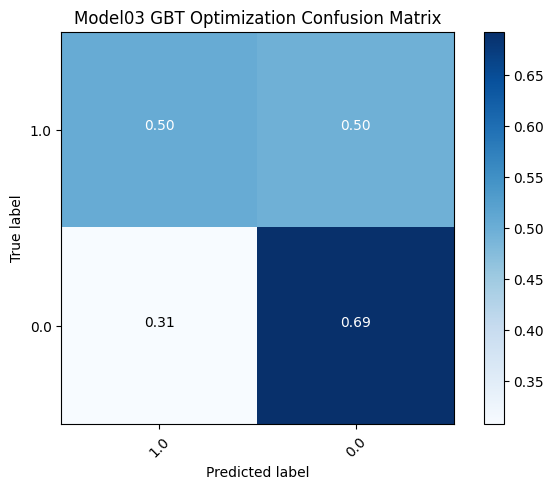

<Figure size 640x480 with 0 Axes>

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt

res = cvModel_gbt.transform(test).select("label", "prediction")

# convert result dataframe to rdd
results = res.rdd.map(lambda pl: (pl.prediction, pl.label * 1.0))
results.take(10)

# instantiate metrics object (there is another object for categorial evaluation!!!)
metrics = MulticlassMetrics(results)

# show confusion matrix
cmat = metrics.confusionMatrix().toArray()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmat, classes=class_names, normalize=True,
                      title='Model03 GBT Optimization Confusion Matrix')
plt.show()
plt.savefig('gbtcm.png')

### 10.7 GBT Model Performance Visualization

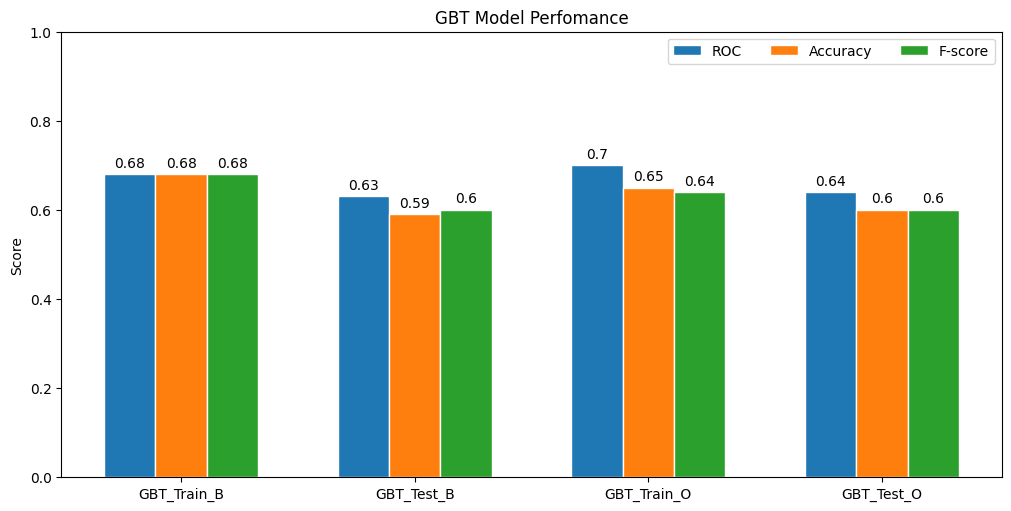

In [ ]:
# plt.style.use('ggplot')

model_dataset = ("GBT_Train_B", "GBT_Test_B", "GBT_Train_O", "GBT_Test_O")
metric_score=pd.read_csv('/content/drive/MyDrive/gp_527/gbt.csv')

x = np.arange(len(model_dataset))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,5), layout='constrained')

for attribute, measurement in metric_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='white')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('GBT Model Perfomance')
ax.set_xticks(x + width, model_dataset)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 1)
plt.savefig('gbt.png', dpi=300)
# files.download('decision_tree.png')
plt.show()

## 11 Models Comparison and Visualization

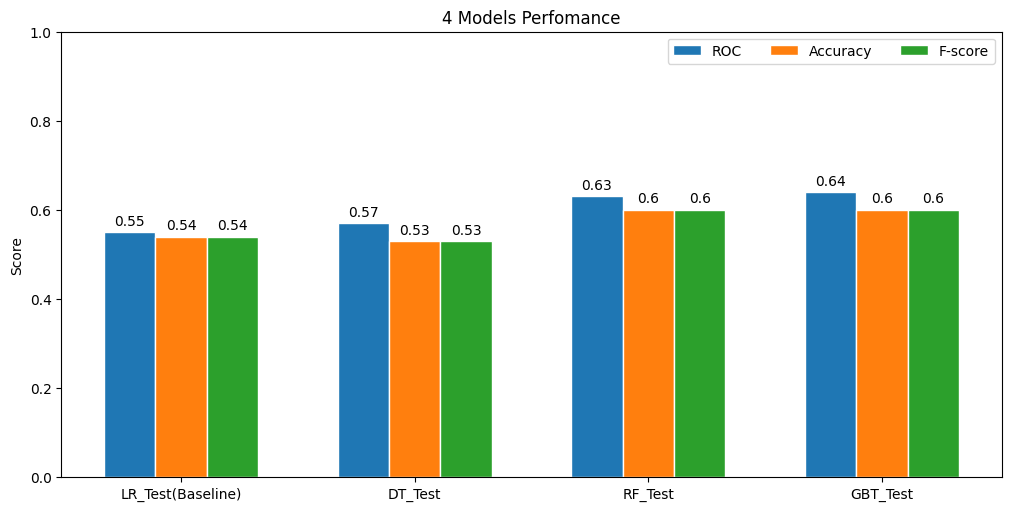

In [ ]:
# plt.style.use('ggplot')

model_dataset = ("LR_Test(Baseline)", "DT_Test", "RF_Test", "GBT_Test")
metric_score=pd.read_csv('/content/drive/MyDrive/gp_527/all.csv')

x = np.arange(len(model_dataset))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,5), layout='constrained')

for attribute, measurement in metric_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='white')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('4 Models Perfomance')
ax.set_xticks(x + width, model_dataset)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 1)
plt.savefig('models.png', dpi=300)
# files.download('decision_tree.png')
plt.show()

## 10 Model Ensemble

In [ ]:
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

'''
Important Step !!
Rename the model output, incase they repeat and overlap with each other 
if not rename, both model output will call prediction
'''


In [ ]:
# Ensemble RandomForest and LogisticRegression

rf = RandomForestClassifier(numTrees=20, featuresCol='features', labelCol='label', 
                            predictionCol='prediction_rf', rawPredictionCol='rawPrediction_rf', probabilityCol='probability_rf')

rf2 =LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0.2, featuresCol='probability_rf', labelCol='label',
                            predictionCol='prediction_rf2', rawPredictionCol='rawPrediction_rf2', probabilityCol='probability_rf2')

# evaluator, also need to rename to match the rf output name (i.e., prediction_rf)
evaluator= MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction_rf2", metricName="accuracy")

pipeline = Pipeline(stages = [rf, rf2]) # first use rf to predict, then lr take the prediction
model = pipeline.fit(train)
result = model.transform(test)
# result.show()

ensemble_acc = evaluator.evaluate(result)

print("Here are the results!")
print('-'*80)
print('A ensemble model had an accuracy of: {0:2.2f}%'.format(ensemble_acc*100))

Here are the results!
--------------------------------------------------------------------------------
A ensemble model had an accuracy of: 60.96%
